# 作業目標:
    
    建立一個網路模型

# 作業重點:

請修改 Name 中, 自定義的 Layer 名稱

增加一層全連階層

宣告 MODEL API, 分別採用自行定義的 Input/Output Layer

model.summary 查看 Layers stack

In [1]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

#主要輸入接收新聞標題本身，即一個整數序列（每個整數編碼一個詞）。
#這些整數在1 到10,000 之間（10,000 個詞的詞彙表），且序列長度為100 個詞
#宣告一個 NAME 去定義Input
main_input = Input(shape=(100,), dtype='int32', name='main_input')


# Embedding 層將輸入序列編碼為一個稠密向量的序列，
# 每個向量維度為 512。
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# LSTM 層把向量序列轉換成單個向量，
# 它包含整個序列的上下文信息
lstm_out = LSTM(32)(x)

Using TensorFlow backend.


In [2]:
#插入輔助損失，使得即使在模型主損失很高的情況下，LSTM 層和Embedding 層都能被平穩地訓練
news_output = Dense(1, activation='sigmoid', name='news_out')(lstm_out)

In [3]:
#輔助輸入數據與LSTM 層的輸出連接起來，輸入到模型
import keras
news_input = Input(shape=(5,), name='news_in')
x = keras.layers.concatenate([lstm_out, news_input])


# 堆疊多個全連接網路層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
#作業解答: 新增兩層
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

#新增一層全連階層
y = keras.layers.concatenate([lstm_out, news_input])

#stacking
y = Dense(64, activation='relu')(y)
y = Dense(64, activation='relu')(y)
y = Dense(64, activation='relu')(y)
y = Dense(64, activation='relu')(y)

#concatenate two connection layer
z = keras.layers.concatenate([x,y])


# 最後添加主要的邏輯回歸層
main_output = Dense(1, activation='sigmoid', name='main_output')(z)

In [4]:
# 宣告 MODEL API, 分別採用自行定義的 Input/Output Layer
model = Model(inputs=[main_input, news_input], outputs=[main_output, news_output])

In [5]:
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'news_out': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'news_out': 0.2})



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_1 (LSTM)                   (None, 32)           69760       embedding_1[0][0]                
__________________________________________________________________________________________________
news_in (InputLayer)            (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

In [7]:
from keras.utils import plot_model
import matplotlib.pyplot as plt
from skimage import io

In [8]:
import os
os.environ["PATH"] += ";C:/Program Files (x86)/Graphviz2.38/bin"
os.environ["PATH"]

'C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\Library\\bin;C:\\ProgramData\\Anaconda3\\Scripts;C:\\ProgramData\\Anaconda3\\bin;C:\\ProgramData\\Anaconda3\\condabin;C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\Library\\bin;C:\\ProgramData\\Anaconda3\\Scripts;C:\\ProgramData\\Anaconda3;C:\\ProgramData\\Anaconda3\\Library\\mingw-w64\\bin;C:\\ProgramData\\Anaconda3\\Library\\usr\\bin;C:\\ProgramData\\Anaconda3\\Library\\bin;C:\\ProgramData\\Anaconda3\\Scripts;C:\\WINDOWS\\system32;C:\\WINDOWS;C:\\WINDOWS\\System32\\Wbem;C:\\WINDOWS\\System32\\WindowsPowerShell\\v1.0;C:\\WINDOWS\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files\\Common Files\\Intel\\WirelessCommon;C:\\Program Files (x86)\\NVIDIA Corporation\\PhysX\\Common;C:\\Users\\USER\\AppData\\Local\\M

In [9]:
plot_model(model, './model3.bmp', show_shapes=True)

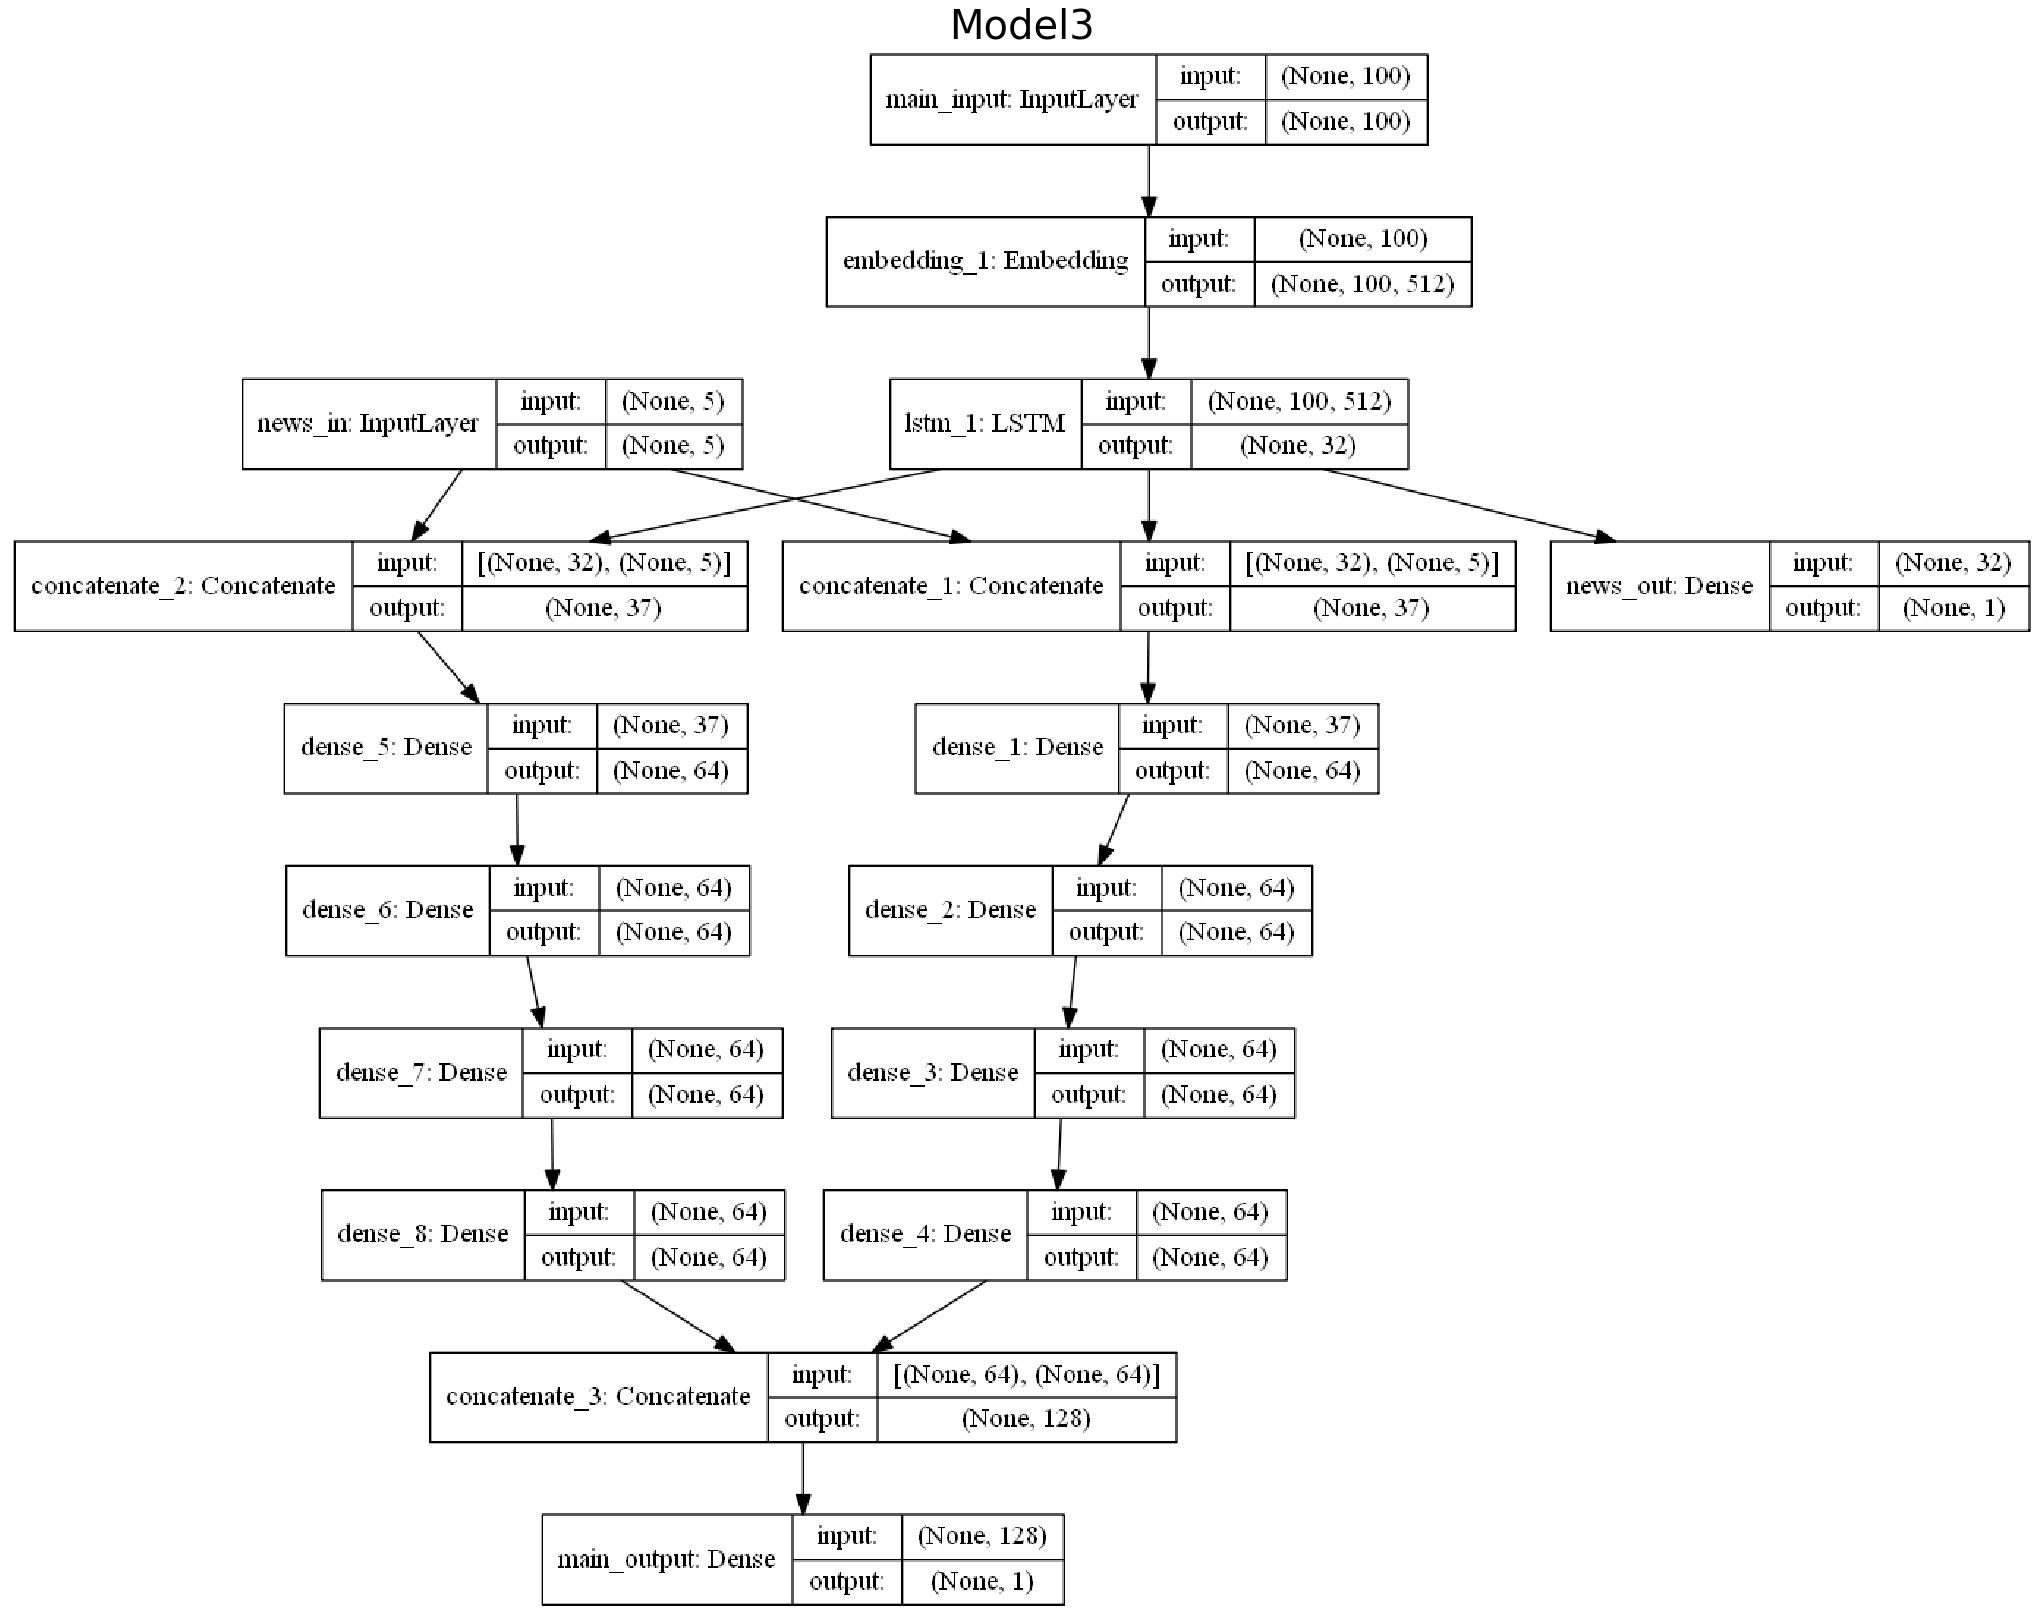

In [17]:
fig = io.imread("model3.bmp")
plt.figure(figsize=(80,80))
plt.subplot(121)
plt.title("Model3",fontsize=40)
plt.imshow(fig)
plt.axis("off")
plt.show()